# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [4]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = (np.pi**(D*0.5)) * (R**D) / (sp.gamma(1 + D * 0.5))
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

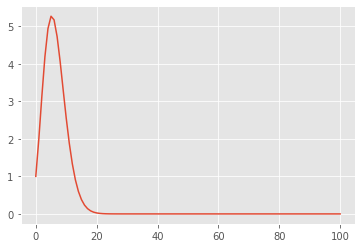

In [5]:
x = range(101)
y = []
for i in x:
    y.append(getSphereVolumeExact(i))
plt.plot(x, y)

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [6]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = 0.0
    
    Nin = 0.0
    for i in range (N):
        r2 = 0.0
        for j in range (D):
            x = 2 * np.random.rand() - 1
            r2 += x*x
        if (r2 < 1):
            Nin += 1
    
    V = (Nin/N) * ((2*R)**D)
    
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

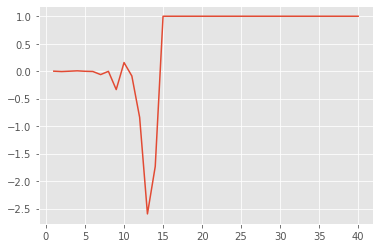

In [72]:
x = range(1, 41)
y_ex = []
y = []
eps = []
for i in x:
    y_ex.append(getSphereVolumeExact(i))
for i in x:
    y.append(getSphereVolumePseudorandom(10000, i))
for i in range(len (y)):
    eps.append((y_ex[i] - y[i]) / y_ex[i])
    
plt.plot(x, eps)

#plt.plot(x, y)

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [55]:
#!pip install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [58]:
sobol_seq.i4_sobol_generate?

In [68]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    p = sobol_seq.i4_sobol_generate(D, N)
    
    Nin = 0.0
    
    for i in range(N):
        s2 = 0.0
        for j in range(D):
            s2 += p[i][j]**2
        if (s2 < 1):
            Nin += 1
            
    V = ((Nin / N) * (2**D)) * (R**D)
    
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

C:\Users\turys\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\turys\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


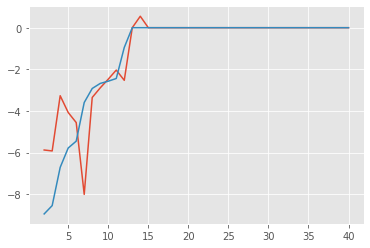

In [82]:
x = range(1, 41)
y_ex = []
y = []
y_p = []
eps_p = []
eps_q = []
for i in x:
    y_ex.append(getSphereVolumeExact(i))
for i in x:
    y.append(getSphereVolumeQuasirandom(10000, i))
for i in x:
    y_p.append(getSphereVolumePseudorandom(10000, i))
for i in range(len (y)):
    eps_q.append(np.log(np.abs((y_ex[i] - y[i]) / y_ex[i])))
for i in range(len (y)):
    eps_p.append(np.log(np.abs((y_ex[i] - y_p[i]) / y_ex[i])))
    
plt.plot(x, eps_p)
plt.plot(x, eps_q)

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

In [84]:
# Как видим, ошибка для квазислучайных и псевдослучайных чисел в целом растет одинаково, но для квазислучайных чисел она это делает монотонно и примерно как c**D при некотором c (т.к. близка к прямой в логарифмическом масштабе).

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [9]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.ones((N, N), dtype = int)
    
    for i in range (N):
        for j in range (N):
            tmp = ((int) (np.random.rand() + 0.5)) * 2 - 1
            state[i][j] *= tmp
            
    
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [10]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    
    dx = [1, 0,-1, 0]
    dy = [0, 1, 0,-1]
    
    sm = 0
    for k in range(4):
        sm += state[(i + dx[k]) % len(state)][(j + dy[k]) % len(state)]
        
    dE = 2.0 * sm * state[i][j]
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [11]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    for k in range(len(state)**2):
        i = (int)(np.random.rand() * len(state))
        j = (int)(np.random.rand() * len(state))

        dE = getDeltaE(i, j, state)

        tmp = np.random.rand()
        if (np.exp(-dE/T) > tmp):
            state[i][j] *= -1
    
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [12]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    
    E = 0.0
    
    for i in range (len(state)):
        for j in range (len(state)):
            E += -0.5*getDeltaE(i, j, state)
    
    E *= 0.5     #устраняем повторный учет связей
    
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [13]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = 0.0
    
    for i in range (len(state)):
        for j in range (len(state)):
            M += state[i][j]
    
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [18]:
N       = 10         # размер решетки NxN
Nt      = 100         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 300         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

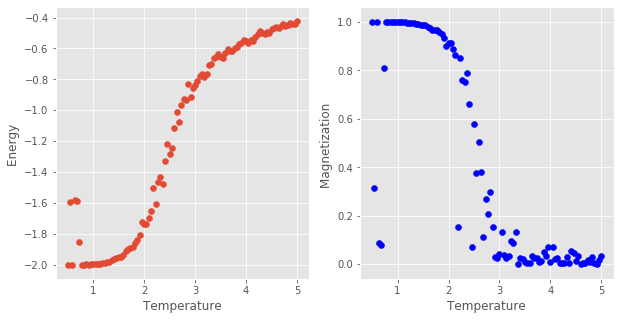

In [19]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

In [83]:
# На графиках видно, что с ростом температуры в какой-то момент достаточно резко меняются энергия и намагниченность.
# Это соответствует размагничиванию материала при пересечении точки Кюри.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [49]:
N = 64
state = getInitialState(N)

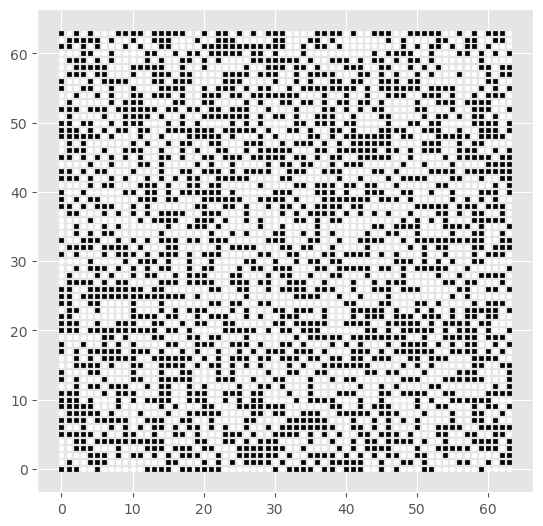

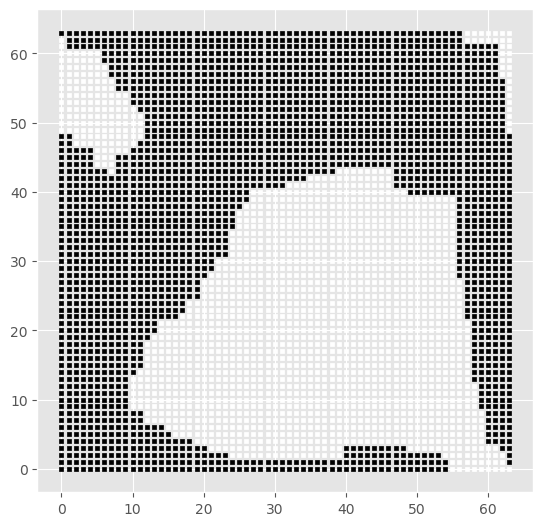

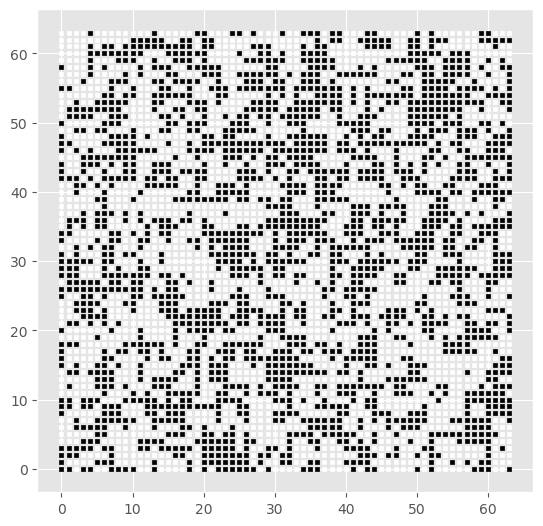

In [50]:
def draw_state (st, nx, ny, m_s):
    x_up = []
    y_up = []
    x_down = []
    y_down = []
    _, ax = plt.subplots(figsize=(6.4, 6.4), dpi=100)
    for i in range(ny):
        for j in range(nx):
            if (state[i][j] == 1):
                x_up.append(j)
                y_up.append(i)
            else:
                x_down.append(j)
                y_down.append(i)
    ax.scatter(x_up, y_up, s=m_s, c="white", marker='s')#, alpha = 0.5)
    ax.scatter(x_down, y_down, s=m_s, c="black", marker='s')#, alpha = 0.5)
    
              
draw_state(state, N, N, 10)

#state_low = state.copy()
#state_high = state.copy()

for i in range(100):
    state = makeFlip(0.01, state)
    
draw_state(state, N, N, 10)

for i in range(100):
    state = makeFlip(5, state)
    
draw_state(state, N, N, 10)

In [57]:
# Как видим, если случайное состояние проведет некоторое время при низкой температуре, оно упорядочится.
# На рисунке 2 видно, что остается только две области одинаковой ориентации спина 
# (т.к. у нас топология тора, 3 белых пятна являются, на самом деле, одним целым)
# Далее, если после этого упорядоченное состояние нагревать, порядок разрушится. (см. рис. 3)